<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            Table of Contents:
            </span>   
        </font>    
</h2>
<span style='font-family:Georgia'>
    <ol>
        <li><a href='#intro'>Introduction</a></li>
        <li><a href='#libraries'>Getting Jupyter Ready</a></li>
        <li><a href='#import'>Reading & Understanding the data</a></li>
        <ol>
            <li><a href='#input'>Importing the input files</a></li>
            <li><a href='#inspect'>Inspect Data Frames</a></li>
                <ol>
                <li><a href='#sample'>sample</a></li>
                <li><a href='#info'>info</a></li>
                <li><a href='#isnull'>isnull</a></li>
                <li><a href='#duplicated'>duplicated</a></li>
                <li><a href='#describe'>describe</a></li>
                <li><a href='#shape'>shape and size</a></li>
                </ol>
        </ol>
        <li><a href='#clean'>Data Preparation</a></li>
        <ol>
            <li><a href='#null'>Null Value Calculation</a></li>
            <li><a href='#clean2'>Analyze & Delete Unnecessary Columns in day dataset</a></li>
            <li><a href='#stdval'>Standardize Values</a></li>
            <li><a href='#dconv'>Data Type Conversion</a></li>
            <li><a href='#impute'>Null Value Data Imputation</a></li>
            <li><a href='#outlier'>Identifying the outliers</a></li>
        </ol>
        <li><a href='#analysis'>Data Analysis</a></li>
        <ol>
            <li><a href='#univariate'>Univariate Analysis</a></li>
            <li><a href='#bivariate'>Bivariate Analysis</a></li>
            <li><a href='#dummy'>Creating Dummy Variables</a></li>
        </ol>
        <li><a href='#model'>Model Building</a></li>
        <li><a href='#feature'>Feature Selection</a></li>
        <li><a href='#selection'>Feature Selection using VIF and p-values</a></li>
        <li><a href='#final'>Building the Final Model</a></li>
        <li><a href='#evaluation'>Model Evaluation</a></li>
        <li><a href='#conclusion'>Conclusions</a></li>
    </ol>
</span>
    

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h2>

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Introduction:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    The bike-sharing provider, BoomBikes, has experienced a decline in revenue due to the ongoing Corona pandemic. In order to understand the demand for shared bikes after the quarantine situation ends, the company has engaged a consulting firm to analyze the factors that influence the demand for shared bikes in the American market. A large dataset containing daily bike rental information, including various meteorological surveys and user behavior, has been collected for analysis. The objective of this project is to build a multiple linear regression model to predict the demand for shared bikes based on environmental and seasonal settings.
    </span>
</p>   
<hr>
<h3>
    <font color = purple >
        <span style='font-family:Georgia'>
            Business Understanding:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    The primary objective of this analysis is to gain insights into the factors that significantly impact the demand for shared bikes in the American market. By understanding these factors, BoomBikes can adjust their business strategy to meet demand levels and customer expectations effectively. The analysis aims to answer questions such as:
    </span>
</p>
<ul>
    <span style='font-family:Georgia'>
        <li>How do environmental variables such as temperature, humidity, and wind speed affect bike demand?</li>
        <li>What is the impact of seasonal variations on bike rentals?</li>
        <li>Does weather condition, categorized into different weathersit levels, influence the bike demand?</li>
        <li>Are there any other factors, such as holidays or working days, that affect bike rentals?</li>
    </span>
</ul>

<hr>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Business Objective:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
        The primary business objective of this project is to develop a reliable multiple linear regression model that accurately predicts the demand for shared bikes. By achieving this objective, BoomBikes aims to:
    </span>
<ul>
    <span style='font-family:Georgia'>
        <li>Understand the significant variables that drive bike demand and their respective impact.</li>
        <li>Gain insights into the seasonal patterns of bike rentals and adjust inventory and marketing strategies accordingly.</li>
        <li>Provide data-driven recommendations for pricing, promotions, and operational planning to maximize revenue and customer satisfaction.</li>
        <li>Enable effective resource allocation and capacity planning based on anticipated demand levels.</li>
    </span>
</ul>
</p>

<a id="libraries"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Getting Jupyter Ready:
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.1 Import Python Libraries:
            </span>   
        </font>    
</h3>

In [237]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

# Set the style using seaborn
sns.set_theme(style='darkgrid')

# Set the style to a seaborn style others are 'seaborn-whitegrid', or 'seaborn-ticks'
sns.set_style('darkgrid')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.2 Supress Warnings:
            </span>   
        </font>    
</h3>

In [238]:
import warnings
warnings.filterwarnings('ignore')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.3 Adjust Jupyer Views:
            </span>   
        </font>    
</h3>

In [239]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<a id="import"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h2>

<a id="input"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.1 Importing the input files
            </span>   
        </font>    
</h3>

In [240]:
# Load the dataset
data = pd.read_csv(r"D:\CampusX Data Science Mentorship Program\ML\ML prject\bike_demand_prediction_model\day.csv")

# view datasets
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.2 Inspect Data Frames
            </span>   
        </font>    
</h3>

<a id="sample"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.1 sample
            </span>   
        </font>    
</h4>

In [241]:
data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
196,197,16-07-2018,3,0,7,0,6,0,1,28.153347,31.91315,58.5000,13.958914,2418,3505,5923
187,188,07-07-2018,3,0,7,0,4,1,1,30.750000,34.34355,65.1250,10.666400,754,3838,4592
14,15,15-01-2018,1,0,1,0,6,0,2,9.566653,12.40560,49.8750,10.583521,222,1026,1248
31,32,01-02-2018,1,0,2,0,2,1,2,7.879134,11.72650,82.9565,3.565271,47,1313,1360
390,391,26-01-2019,1,1,1,0,4,1,2,14.008347,17.80250,76.9583,4.917519,244,3831,4075


<a id="info"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.2 info
            </span>   
        </font>    
</h4>

In [242]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<a id="isnull"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.3 isnull
            </span>   
        </font>    
</h4>

In [243]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<a id="duplicated"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.4 duplicated
            </span>   
        </font>    
</h4>

In [244]:
data.duplicated().sum()

0

<a id="describe"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.5 describe
            </span>   
        </font>    
</h4>

In [245]:
# Checking the numeric variables of the dataframes
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<a id="shape"></a>
<h4 name='libraries'>   
      <font color = orange >
            <span style='font-family:Georgia'>
            3.2.6 shape and size
            </span>   
        </font>    
</h4>

In [246]:
# Database dimension
print("Database dimension     :",data.shape)
#Database size
print("Database size -         :",data.size)

Database dimension     : (730, 16)
Database size -         : 11680


<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Data Preparation
            </span>   
        </font>    
</h2>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.1 Null Value Calculation
            </span>   
        </font>    
</h3>

In [247]:
# % null value in each column
round(data.isnull().sum() / data.shape[0] * 100.00,2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Based on the above Matrix, it is evidednt that the dataset has no missing values.
    </span>    
</div>

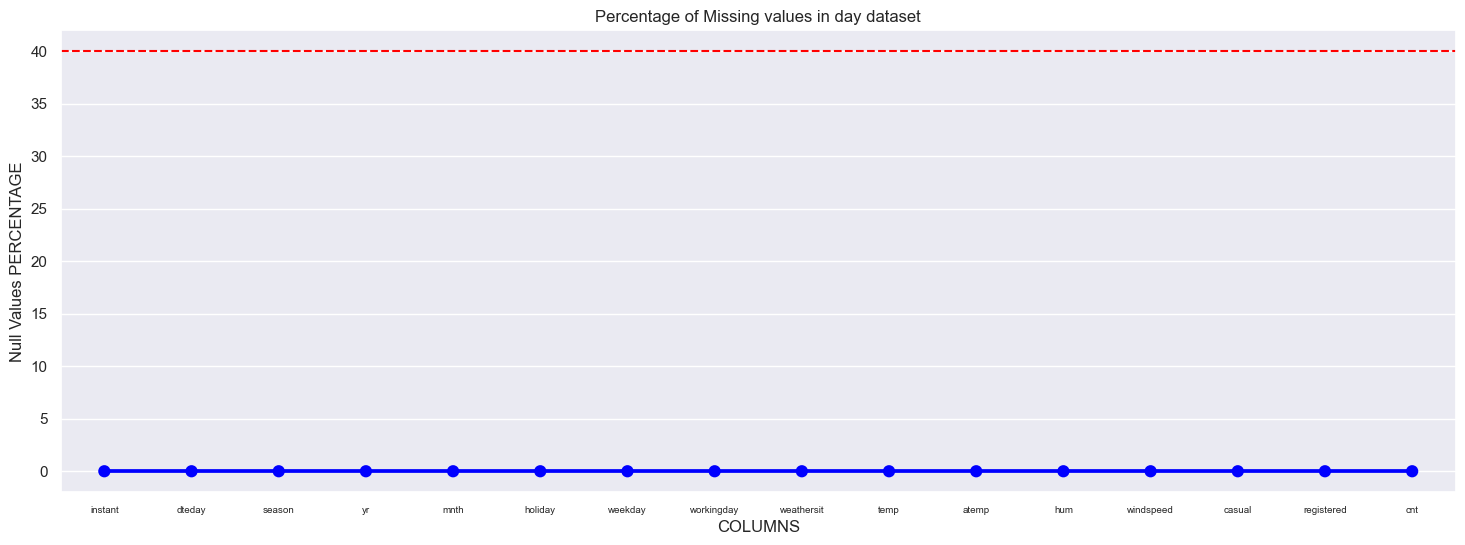

In [248]:
null_data = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
null_data.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_data,color='blue')
plt.xticks(rotation =0,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in day dataset")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>From the plot we can see there are no columns in which percentage of null values more than 40% are marked above the red line and all the columns which have less than 40 % null values below the red line.
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2 Analyze & Delete Unnecessary Columns in applicationDF
            </span>   
        </font>    
</h3>

In [249]:
data.drop(['instant'],axis=1,inplace=True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>we can see that instant is an index column so we droped it 
    </span>    
</div>

In [250]:
data.drop(['dteday'],axis=1,inplace=True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>we can see the column yr and month contains the data of dteday so to avoid confusion droped the dteday column 
    </span>    
</div>

In [251]:
data.drop(['casual','registered'],axis=1,inplace=True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>Since the total count of rentals (`cnt`) is the sum of casual and registered users, we will exclude the variables "casual" and "registered" from our analysis as they are components of the target variable.
    </span>    
</div>

<a id="stdval"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.3 Standardize Values
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <ul>
            <li>Convert 'season', 'weathersit', and 'weekday' into categorical variables</li>
        </ul>       
    </span>    
</div>

In [252]:
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weathersit'] = data['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'heavy_rain'})
data['weekday']=data['weekday'].map(({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}))

<a id="dconv"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.4 Data Type Conversion
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <ul>
            <li>changing the datatypes of 'temp','atemp','hum','windspeed','cnt' columns to appropriate types</li>
        </ul>       
    </span>    
</div>

In [253]:
columns_to_convert = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric)

<a id="impute"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.5 Null Value Data Imputation
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        Since there are no null values in any of the columns, further imputation is not required.
    </span>    
</div>

<a id="outlier"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.6 Identifying the outliers
            </span>   
        </font>    
</h3>

<p>
    <span style='font-family:Georgia'>
           Finding outlier information in day data
    </span>
</p>

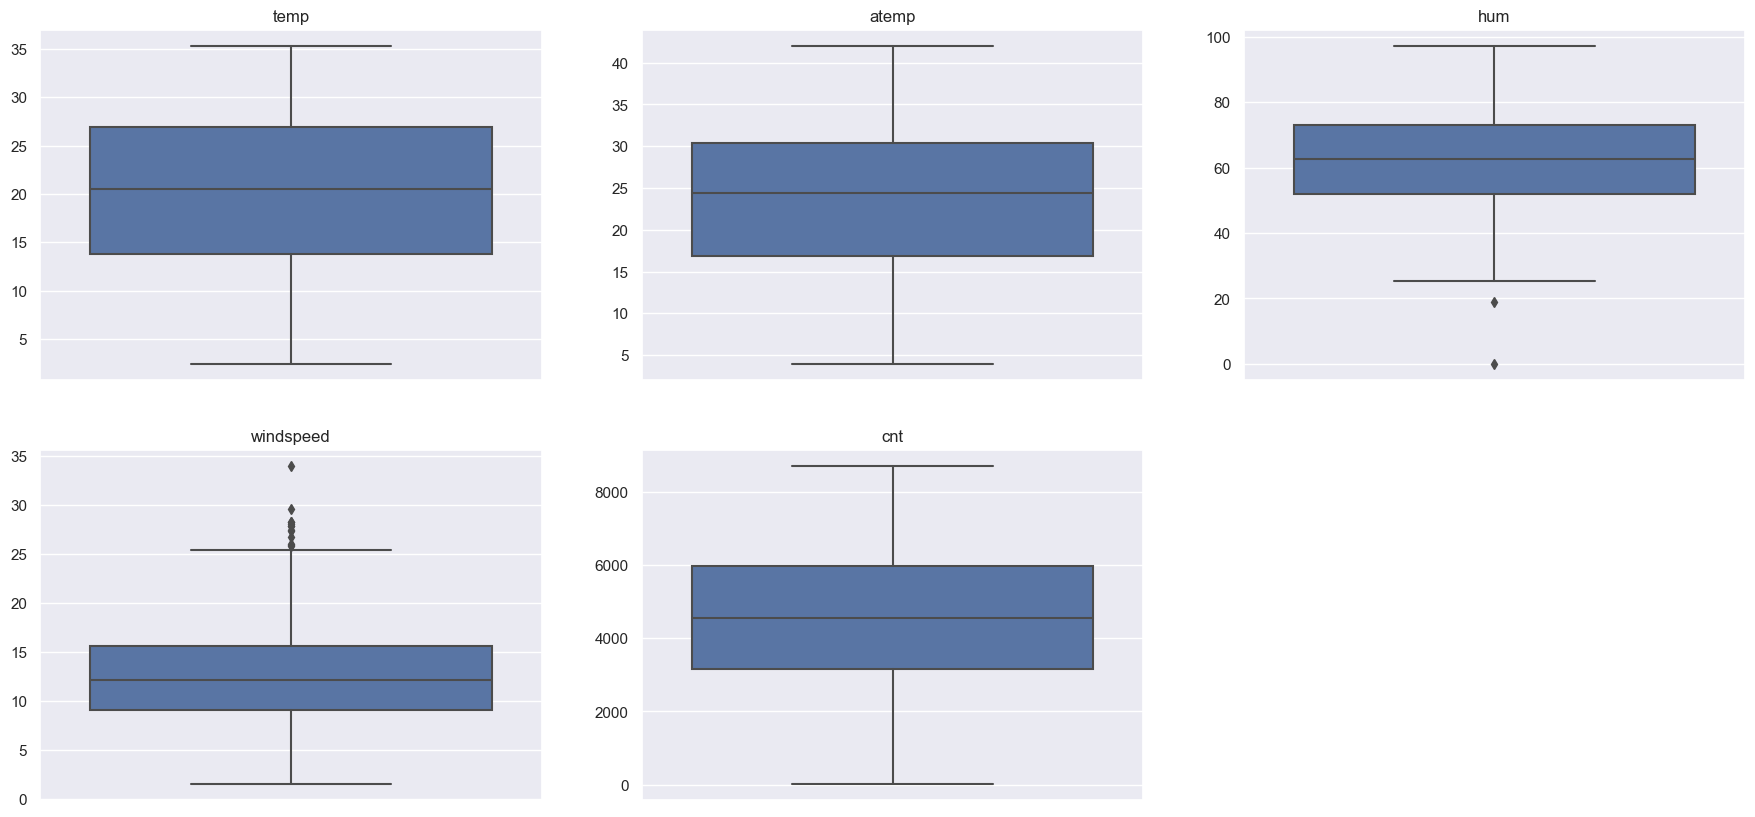

In [254]:
plt.figure(figsize=(22,10))

data_outlier_col = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
for i in enumerate(data_outlier_col):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(y=data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [255]:
# Select the columns with numerical data
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Calculate the IQR for each column
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Identify outliers for each column
outliers = ((data[numeric_columns] < (Q1 - threshold * IQR)) | (data[numeric_columns] > (Q3 + threshold * IQR))).any()

# Print the columns with outliers
outlier_columns = outliers[outliers].index.tolist()
print("Columns with potential outliers:", outlier_columns)


Columns with potential outliers: ['hum', 'windspeed']


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>For the 'hum' column, high outliers could indicate instances of exceptionally high humidity levels. These instances might be attributed to specific weather conditions or measurement errors. Similarly, for the 'windspeed' column, outliers could represent instances of unusually strong wind speeds, which could be due to specific weather patterns or measurement anomalies.
    </span>    
</div>

<a id="analysis"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            5. Data Analysis
            </span>   
        </font>    
</h2>

<a id="univariate"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.1 Univariate Analysis
            </span>   
        </font>    
</h3>

<a id="catvar"></a>
<h4>   
      <font color = orange >
            <span style='font-family:Georgia'>
             5.1.1 Univariate Analysis on Numerical Columns
            </span>   
        </font>    
</h4>

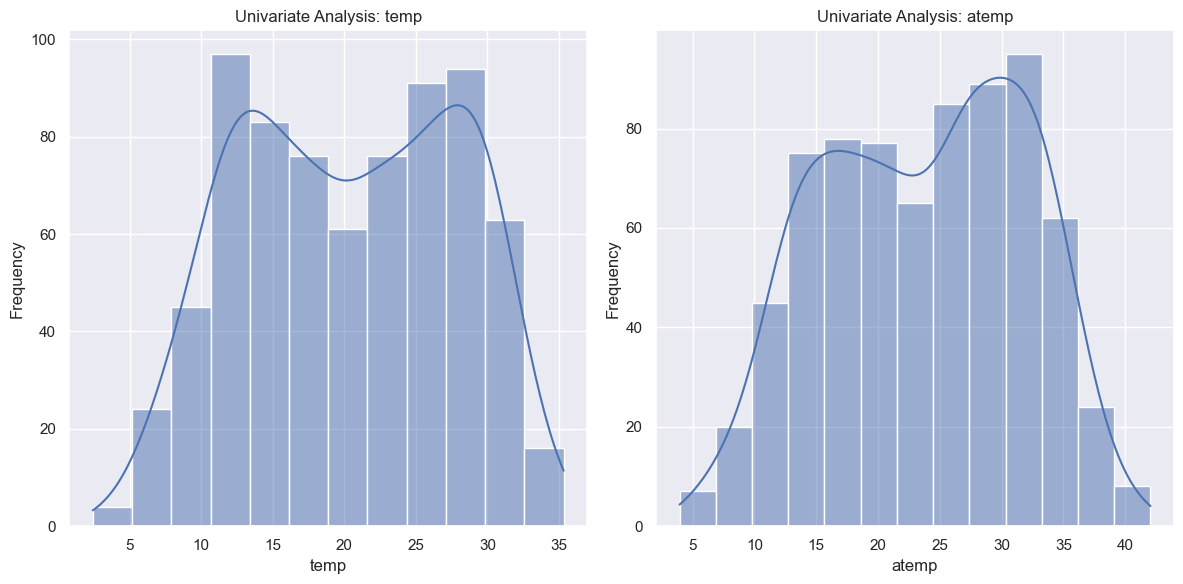

In [256]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Univariate analysis for 'temp'
sns.histplot(data=data, x='temp', kde=True, ax=axes[0])
axes[0].set_xlabel('temp')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Univariate Analysis: temp')

# Univariate analysis for 'atemp'
sns.histplot(data=data, x='atemp', kde=True, ax=axes[1])
axes[1].set_xlabel('atemp')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Univariate Analysis: atemp')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>From above graphs we can say that temp and atemp have a almost same distribution
    </span>    
</div>

<a id="catvar"></a>
<h4>   
      <font color = orange >
            <span style='font-family:Georgia'>
             5.1.2 Univariate Analysis on Categorical Columns
            </span>   
        </font>    
</h4>

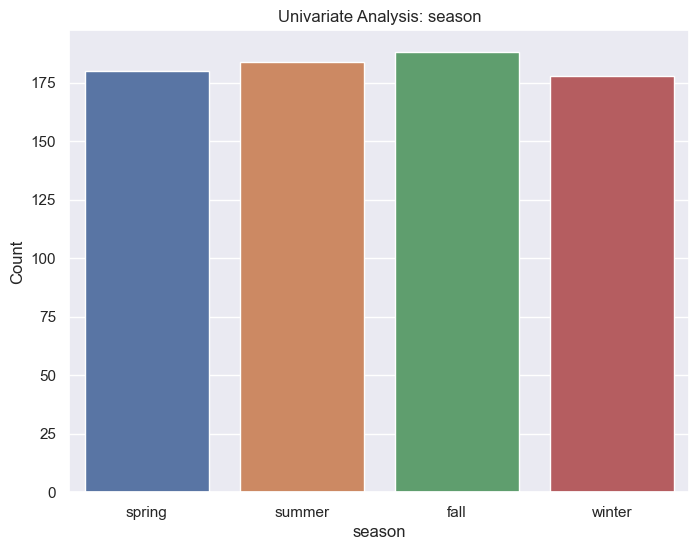

In [257]:
# Select the categorical column for univariate analysis
categorical_column = 'season'

# Calculate the value counts of the categorical column
value_counts = data[categorical_column].value_counts()

# Plot the value counts as a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title('Univariate Analysis: ' + categorical_column)
plt.show()


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> The bar plot shows that each season occurs with similar frequencies, indicating that the dataset contains a roughly equal representation of bike rental data across different seasons.
    </span>    
</div>

<a id="bivariate"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.2 Bivariate Analysis
            </span>   
        </font>    
</h3>

<a id="catvar"></a>
<h4>   
      <font color = orange >
            <span style='font-family:Georgia'>
             5.1.1 Bivariate Analysis on Numerical Columns
            </span>   
        </font>    
</h4>

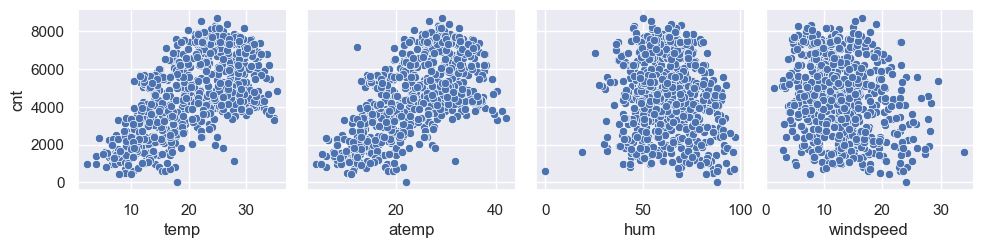

In [258]:
# Plot scatter plots to visualize the relationships
sns.pairplot(data, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt', kind='scatter')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> from above graphs we can say that temp and atemp have a showing almost similar distribution with respect to cnt column
    </span>    
</div>

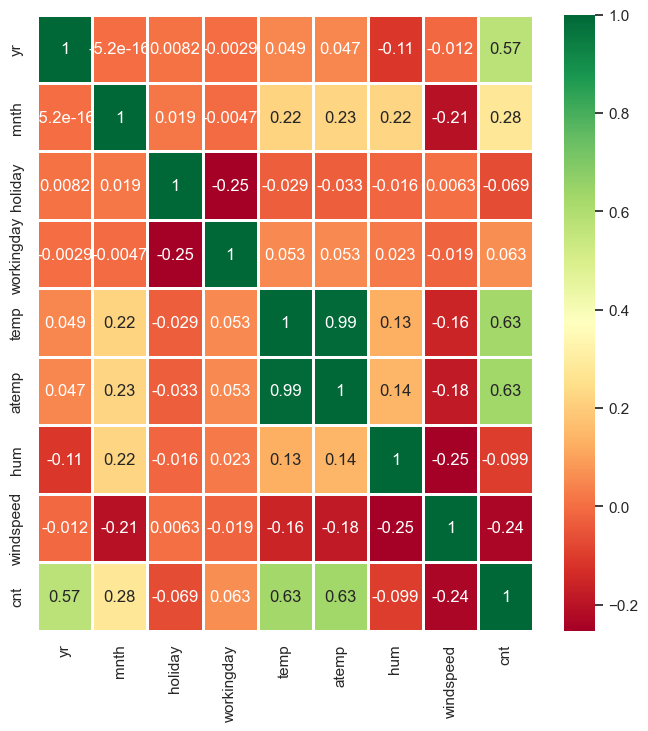

In [259]:
Contact_corr = data.corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> correlation between temp and atemp is 0.99 which is almost 1. Based on this high correlation, we can conclude that there is a strong linear relationship between the actual temperature and the perceived temperature. It suggests that when the actual temperature increases or decreases, the perceived temperature follows a very similar pattern.
    </span>    
</div>

In [260]:
data.drop(['temp'],axis=1,inplace=True)

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <ul>
            <li>Since the 'temp' and 'atemp' columns have a high correlation of 0.99, indicating a strong linear relationship and redundancy between the variables, it is generally reasonable to drop one of them to avoid multicollinearity in the dataset.</li>
            <li>In this case, you can consider dropping the 'temp' column, as 'atemp' provides similar information but represents the perceived temperature. By dropping the 'temp' column, you can simplify the dataset and reduce redundancy without losing significant information.</li>
        </ul>       
    </span>    
</div>

<a id="catvar"></a>
<h4>   
      <font color = orange >
            <span style='font-family:Georgia'>
             5.1.2 Bivariate Analysis on Categorical Columns
            </span>   
        </font>    
</h4>

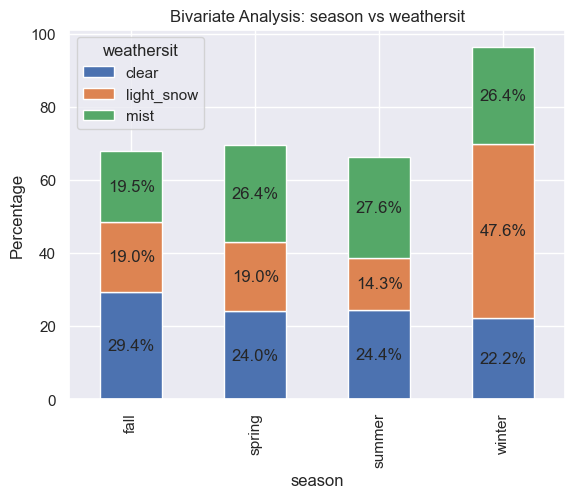

In [261]:
# Select the categorical columns for bivariate analysis
categorical_column_1 = 'season'
categorical_column_2 = 'weathersit'

# Create a cross-tabulation (contingency table)
cross_tab = pd.crosstab(data[categorical_column_1], data[categorical_column_2])

# Calculate column-wise percentages
column_totals = cross_tab.sum(axis=0)
cross_tab_percentages = cross_tab.div(column_totals, axis=1) * 100

# Plot a stacked bar plot with percentages

ax = cross_tab_percentages.plot(kind='bar', stacked=True)

# Add percentages inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel(categorical_column_1)
plt.ylabel('Percentage')
plt.title('Bivariate Analysis: ' + categorical_column_1 + ' vs ' + categorical_column_2)
plt.legend(title=categorical_column_2)
plt.show()


<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <ul>
            <li>Fall: Among the different weather situations, 'clear' represents the highest percentage (29.4%) in the fall season, followed by 'mist' (19.5%) and 'light_snow' (19.0%). This indicates that clear weather conditions are relatively more common during the fall season.</li>
            <li>Spring: In the spring season, 'clear' weather still has the highest percentage (24.0%), followed by 'mist' (26.4%) and 'light_snow' (19.0%). This suggests that clear weather conditions are prevalent during the spring season as well.</li>
            <li>Summer: Similar to fall and spring, 'clear' weather is the most frequent situation during the summer season, with a percentage of 24.4%. 'Mist' follows closely at 27.6%, while 'light_snow' has the lowest percentage (14.3%) during the summer. This indicates a higher likelihood of clear weather during the summer months.</li>
            <li>Winter: Interestingly, the winter season exhibits a different distribution of weather situations compared to the other seasons. 'Light_snow' has the highest percentage (47.6%) in winter, followed by 'mist' (26.4%) and 'clear' (22.2%). This suggests that snowfall is more common during the winter season, which aligns with the typical weather patterns in colder regions.</li>
        </ul>       
    </span>    
</div>

<a id="dummy"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.3 Creating Dummy Variables
            </span>   
        </font>    
</h3>

- By creating dummy variables, we convert categorical variables into a binary numerical representation. Each category of the variable is transformed into a separate binary variable (0 or 1), making it easier for algorithms to process and interpret the data.

In [262]:

data['mnth']=data['mnth'].astype(object)
data['season']=data['season'].astype(object)
data['weathersit']=data['weathersit'].astype(object)
data['weekday']=data['weekday'].astype(object)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <br><li>Convert the variables to an object type to facilitate the creation of dummy variables.</li>
    </span>    
</div>

In [263]:
season_dummies = pd.get_dummies(data['season'], prefix='season', drop_first=True)
weathersit_dummies = pd.get_dummies(data['weathersit'], prefix='weathersit', drop_first=True)
weekday_dummies=pd.get_dummies(data['weekday'],drop_first=True)
Month_dummies=pd.get_dummies(data['mnth'],drop_first=True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <br><li>Convert categorical variables to dummy variables</li>
    </span>    
</div>

In [264]:
data = pd.concat([data, season_dummies, weathersit_dummies,weekday_dummies,Month_dummies], axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <br><li>Concatenate the dummy variables with the original dataset</li>
    </span>    
</div>

In [265]:
data.drop(['season', 'weathersit','weekday','mnth'], axis=1, inplace=True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <br><li>Drop the original categorical variables</li>
    </span>    
</div>

<a id="model"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            6. Model Building:
            </span>   
        </font>    
</h2>

In [266]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)
# Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Create X_train and y_train
y_train = df_train['cnt']
X_train = df_train.drop('cnt', axis=1)

X_train_str = X_train.copy()
X_train_str.columns = [str(col) for col in X_train.columns]

<a id="feature"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            7. Feature Selection
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <ul>
            <li>Using the Recursive Feature Elimination (RFE) approach for feature selection, we begin with 15 variables and employ a combination of methods to build a model.</li>
        </ul>       
    </span>    
</div>

In [267]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create the estimator (in this case, a LinearRegression model)
lm = LinearRegression()

# Create the RFE object
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit the RFE object to the training data
rfe.fit(X_train_str, y_train)

# Get the selected feature indices
feature_mask = rfe.support_

# Get the selected feature names
selected_features = X_train_str.columns[feature_mask]

In [268]:
list(zip(X_train_str.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist', True, 1),
 ('Monday', False, 11),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 ('2', False, 6),
 ('3', False, 4),
 ('4', False, 3),
 ('5', True, 1),
 ('6', False, 2),
 ('7', False, 7),
 ('8', True, 1),
 ('9', True, 1),
 ('10', False, 5),
 ('11', False, 9),
 ('12', False, 10)]

In [269]:
print(list(set(X_train_str.columns.to_list()).difference(set(selected_features))))

['Thursday', '6', '10', 'season_summer', '11', '7', '12', 'Tuesday', 'Wednesday', '3', '2', 'Monday', '4']


In [270]:
print(selected_features)

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'weathersit_light_snow', 'weathersit_mist', 'Saturday', 'Sunday', '5', '8', '9'], dtype='object')


In [271]:
X_train_rfe = X_train_str[selected_features]

In [272]:
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Saturday,Sunday,5,8,9
653,1,0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,1,1,0,0,0,0


<a id="selection"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            8. Feature Selection using VIF and p-values
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <ul>
            <li>BUILDING MODEL USING STATSMODEL:</li>
        </ul>       
    </span>    
</div>

In [273]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe1).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          8.06e-186
Time:                        20:00:52   Log-Likelihood:                 503.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     495   BIC:                            -914.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [274]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,40.72
10,Saturday,9.93
11,Sunday,9.67
3,atemp,2.69
6,season_spring,2.65
1,holiday,2.53
4,hum,1.94
7,season_winter,1.92
9,weathersit_mist,1.57
13,8,1.31


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>workingday: It has a very high VIF of 40.72, indicating strong multicollinearity with other variables. High multicollinearity can affect the model's stability and interpretability.
    </span>    
</div>


In [275]:
# Drop the workingday column
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [276]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe1).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          8.06e-186
Time:                        20:00:52   Log-Likelihood:                 503.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     495   BIC:                            -914.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.78
2,atemp,13.92
4,windspeed,3.99
5,season_spring,2.71
6,season_winter,2.32
8,weathersit_mist,2.26
0,yr,2.05
12,8,1.44
11,5,1.37
13,9,1.27


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>Based on the updated VIF values, the 'hum' column has a VIF of 23.78, which indicates high multicollinearity.
    </span>    
</div> 

In [278]:
# DROP THE HUM COLUMN
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [279]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.46e-183
Time:                        20:00:52   Log-Likelihood:                 495.80
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     496   BIC:                            -904.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [280]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.85
3,windspeed,3.94
0,yr,2.05
4,season_spring,1.73
7,weathersit_mist,1.54
5,season_winter,1.52
11,8,1.44
10,5,1.29
12,9,1.25
8,Saturday,1.23


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>The coefficient for 'Saturday' is close to zero (0.0114), indicating that it has a minimal impact on the target variable.</li>
        <li>The p-value for 'Saturday' is 0.326, which is greater than the significance level of 0.05. This suggests that 'Saturday' may not be statistically significant in predicting the target variable.</li>
    </span>    
</div>


In [281]:
# Drop the Saturday column
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [282]:
X_train_rfe3 = sm.add_constant(X_train_rfe)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.0
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.60e-184
Time:                        20:00:52   Log-Likelihood:                 495.30
No. Observations:                 510   AIC:                            -964.6
Df Residuals:                     497   BIC:                            -909.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [283]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.78
3,windspeed,3.91
0,yr,2.05
4,season_spring,1.71
7,weathersit_mist,1.54
5,season_winter,1.51
10,8,1.44
9,5,1.29
11,9,1.25
8,Sunday,1.18


In [284]:
# drop month 8 column
X_train_rfe=X_train_rfe.drop(['8'],axis=1)
X_train_rfe.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,5,9
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,0


In [285]:
X_train_rfe4 = sm.add_constant(X_train_rfe)

lm4 = sm.OLS(y_train,X_train_rfe4).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.96e-185
Time:                        20:00:52   Log-Likelihood:                 494.65
No. Observations:                 510   AIC:                            -965.3
Df Residuals:                     498   BIC:                            -914.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [286]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.93
3,windspeed,3.88
0,yr,2.05
4,season_spring,1.68
7,weathersit_mist,1.53
5,season_winter,1.43
9,5,1.21
8,Sunday,1.18
10,9,1.18
6,weathersit_light_snow,1.08


In [287]:
# Including season_summer as a variable and evaluating if it enhances the model's performance.

X_train_rfe['season_summer']=X_train_str['season_summer']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,5,9,season_summer
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,0,1


In [288]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.42e-185
Time:                        20:00:52   Log-Likelihood:                 497.80
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     497   BIC:                            -914.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [289]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.57
2,atemp,3.96
11,season_summer,2.49
0,yr,2.07
4,season_spring,2.01
5,season_winter,1.66
9,5,1.58
7,weathersit_mist,1.55
10,9,1.23
8,Sunday,1.18


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>The column with index 5 has a relatively high p-value of 0.401, indicating that it is not statistically significant. Therefore, we will remove it from the model.</li>
    </span>    
</div>


In [290]:
# Drop the column 5
X_train_rfe=X_train_rfe.drop(['5'],axis=1)

In [291]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.5
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.30e-186
Time:                        20:00:52   Log-Likelihood:                 497.44
No. Observations:                 510   AIC:                            -970.9
Df Residuals:                     498   BIC:                            -920.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [292]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.48
2,atemp,3.88
0,yr,2.06
4,season_spring,2.00
10,season_summer,1.91
5,season_winter,1.66
7,weathersit_mist,1.55
9,9,1.23
8,Sunday,1.18
6,weathersit_light_snow,1.08


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>The R-squared value increases to 0.835, indicating that the model explains 83.5% of the variance in the target variable.</li>
        <li>The Adjusted R-squared value is 0.831, accounting for the number of predictors and providing a more accurate measure of model fit.</li>
        <li>it appears that the variable "season_summer" is significant in predicting the demand for shared bikes. It has a low p-value (p < 0.05), indicating that it is statistically significant. Additionally, its inclusion in the model improves the model's R-squared and adjusted R-squared values.</li>
    </span>    
</div>


In [293]:
# Including Monday as a variable and evaluating if it enhances the model's performance.

X_train_rfe['Monday']=X_train_str['Monday']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,9,season_summer,Monday
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,1,0


In [294]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.4
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          5.66e-186
Time:                        20:00:52   Log-Likelihood:                 498.74
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     497   BIC:                            -916.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [295]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.48
2,atemp,3.93
0,yr,2.07
4,season_spring,2.01
10,season_summer,1.92
5,season_winter,1.68
7,weathersit_mist,1.55
11,Monday,1.31
9,9,1.23
8,Sunday,1.21


In [296]:
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>Droped the column Monday beacuse the p value of Monday is 0.111 </li>
    </span>    
</div>


In [297]:
# Including Thursday as a variable and evaluating if it enhances the model's performance.

X_train_rfe['Thursday']=X_train_str['Thursday']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,9,season_summer,Thursday
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,1,0


In [298]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.99e-185
Time:                        20:00:52   Log-Likelihood:                 497.45
No. Observations:                 510   AIC:                            -968.9
Df Residuals:                     497   BIC:                            -913.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [299]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.48
2,atemp,3.97
0,yr,2.06
4,season_spring,2.02
10,season_summer,1.91
5,season_winter,1.67
7,weathersit_mist,1.55
9,9,1.23
8,Sunday,1.21
11,Thursday,1.18


In [300]:
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>The column "Thursday" has been dropped from the model because its p-value is 0.883, indicating that it is not statistically significant.</li>
    </span>    
</div>


In [301]:
# Including Tuesday as a variable and evaluating if it enhances the model's performance.

X_train_rfe['Tuesday']=X_train_str['Tuesday']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,9,season_summer,Tuesday
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,1
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,1
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,1,0


In [302]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.6
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.15e-185
Time:                        20:00:53   Log-Likelihood:                 498.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     497   BIC:                            -915.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [303]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.48
2,atemp,4.00
0,yr,2.06
4,season_spring,2.01
10,season_summer,1.92
5,season_winter,1.67
7,weathersit_mist,1.55
9,9,1.23
8,Sunday,1.21
11,Tuesday,1.19


In [304]:
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>The column "Tuesday" has been dropped from the model because its p-value is 0.289, indicating that it is not statistically significant.</li>
    </span>    
</div>


In [305]:
# Including Wednesday as a variable and evaluating if it enhances the model's performance.

X_train_rfe['Wednesday']=X_train_str['Wednesday']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,9,season_summer,Wednesday
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,1,0


In [306]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.2
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.85e-185
Time:                        20:00:53   Log-Likelihood:                 497.52
No. Observations:                 510   AIC:                            -969.0
Df Residuals:                     497   BIC:                            -914.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [307]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.48
2,atemp,3.99
0,yr,2.06
4,season_spring,2.03
10,season_summer,1.93
5,season_winter,1.67
7,weathersit_mist,1.55
11,Wednesday,1.25
9,9,1.23
8,Sunday,1.22


In [308]:
X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>The column "Wednesday" has been dropped from the model because its p-value is 0.681, indicating that it is not statistically significant.</li>
</div>


In [309]:
# Including month 2 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['2']=X_train_str['2']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,9,season_summer,2
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,1,0


In [310]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.90e-185
Time:                        20:00:53   Log-Likelihood:                 497.49
No. Observations:                 510   AIC:                            -969.0
Df Residuals:                     497   BIC:                            -913.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [311]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.49
2,atemp,3.89
4,season_spring,2.32
0,yr,2.06
10,season_summer,1.91
5,season_winter,1.66
7,weathersit_mist,1.55
11,2,1.39
9,9,1.23
8,Sunday,1.18


In [312]:
X_train_rfe=X_train_rfe.drop(['2'],axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>The column "2" has been dropped from the model because its p-value is 0.734, indicating that it is not statistically significant.</li>
    </span>    
</div>


In [313]:
# Including month 6 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['6']=X_train_str['6']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,9,season_summer,6
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,1,0


In [314]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.96e-185
Time:                        20:00:53   Log-Likelihood:                 497.47
No. Observations:                 510   AIC:                            -968.9
Df Residuals:                     497   BIC:                            -913.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [315]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.50
2,atemp,4.23
0,yr,2.06
4,season_spring,2.00
10,season_summer,1.96
5,season_winter,1.67
7,weathersit_mist,1.56
11,6,1.27
9,9,1.25
8,Sunday,1.18


In [316]:
X_train_rfe=X_train_rfe.drop(['6'],axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>The column "6" has been dropped from the model because its p-value is 0.809, indicating that it is not statistically significant.</li>
    </span>    
</div>


In [317]:
# Including month 10 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['10']=X_train_str['10']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,9,season_summer,10
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,1
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,1,0


In [318]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.0
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.14e-186
Time:                        20:00:53   Log-Likelihood:                 500.40
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [319]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.48
2,atemp,3.93
5,season_winter,2.14
0,yr,2.06
4,season_spring,2.00
10,season_summer,1.92
11,10,1.59
7,weathersit_mist,1.55
9,9,1.25
8,Sunday,1.18


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>It is important to interpret the significance of the added variable. The variable "10" has a p-value of 0.016, which is less than the commonly used threshold of 0.05. This suggests that the variable is statistically significant in predicting the demand for shared bikes.</li>
        <li>The R-squared and adjusted R-squared values have improved slightly compared to the previous model. This indicates that the additional variable may have contributed to explaining a bit more of the variance in the bike demand.</li>
    </span>    
</div>


In [320]:
# Including month 11 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['11']=X_train_str['11']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,9,season_summer,10,11
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,1,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,1,0,0


In [321]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.3
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.68e-185
Time:                        20:00:53   Log-Likelihood:                 500.40
No. Observations:                 510   AIC:                            -972.8
Df Residuals:                     496   BIC:                            -913.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [322]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.54
2,atemp,3.93
5,season_winter,3.80
11,10,2.27
12,11,2.27
0,yr,2.06
4,season_spring,2.01
10,season_summer,1.93
7,weathersit_mist,1.55
9,9,1.30


In [323]:
X_train_rfe=X_train_rfe.drop(['11'],axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>The column "11" has been dropped from the model because its p-value is 0.923, indicating that it is not statistically significant.</li>
    </span>    
</div>

In [324]:
# Including month 7 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['7']=X_train_str['7']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,9,season_summer,10,7
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,1,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0,1
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,1,0,0


In [325]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.5
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          5.87e-187
Time:                        20:00:53   Log-Likelihood:                 503.87
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     496   BIC:                            -920.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [326]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.23
3,windspeed,4.49
10,season_summer,2.28
5,season_winter,2.27
4,season_spring,2.10
0,yr,2.06
12,7,1.61
11,10,1.60
7,weathersit_mist,1.55
9,9,1.37


In [327]:
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>Based on the updated VIF values, the 'atemp' column has a VIF of 5.23, which indicates high multicollinearity.
    </span>    
</div> 

In [328]:
X_train_rfe16 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.4
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.74e-154
Time:                        20:00:53   Log-Likelihood:                 423.99
No. Observations:                 510   AIC:                            -822.0
Df Residuals:                     497   BIC:                            -766.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.58

In [329]:
X_train_rfe=X_train_rfe.drop(['7'],axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>The column "7" has been dropped from the model because its p-value is 0.762, indicating that it is not statistically significant.</li>
    </span>    
</div>

In [330]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.41e-155
Time:                        20:00:53   Log-Likelihood:                 423.94
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.58

In [331]:
# Including month 12 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['12']=X_train_str['12']
X_train_rfe.head()

,yr,holiday,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,9,season_summer,10,12
653,1,0,0.300794,0,1,0,0,0,0,0,1,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,1,0,0,1,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,1,0,0,0,1
482,1,0,0.188475,0,0,0,1,0,0,1,0,0


In [332]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          2.77e-155
Time:                        20:00:54   Log-Likelihood:                 425.89
No. Observations:                 510   AIC:                            -825.8
Df Residuals:                     497   BIC:                            -770.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.58

In [333]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.50
4,season_winter,2.72
3,season_spring,1.98
9,season_summer,1.86
0,yr,1.78
10,10,1.77
6,weathersit_mist,1.51
11,12,1.41
7,Sunday,1.16
8,9,1.16


In [334]:
X_train_rfe=X_train_rfe.drop(['12'],axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>The column "12" has been dropped from the model because its p-value is 0.052, indicating that it is not statistically significant.</li>
    </span>    
</div>

In [335]:
# Including month 3 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['3']=X_train_str['3']
X_train_rfe.head()

,yr,holiday,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,9,season_summer,10,3
653,1,0,0.300794,0,1,0,0,0,0,0,1,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,1,0,0,1,0,0,0,0,1
728,1,0,0.663106,1,0,0,0,1,0,0,0,0
482,1,0,0.188475,0,0,0,1,0,0,1,0,0


In [336]:
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     148.2
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.60e-155
Time:                        20:00:54   Log-Likelihood:                 426.45
No. Observations:                 510   AIC:                            -826.9
Df Residuals:                     497   BIC:                            -771.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.58

In [337]:
# Including month 4 as a variable and evaluating if it enhances the model's performance.

X_train_rfe['4']=X_train_str['4']
X_train_rfe.head()

,yr,holiday,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,9,season_summer,10,3,4
653,1,0,0.300794,0,1,0,0,0,0,0,1,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,1,0,0,1,0,0,0,0,1,0
728,1,0,0.663106,1,0,0,0,1,0,0,0,0,0
482,1,0,0.188475,0,0,0,1,0,0,1,0,0,1


In [338]:
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe20).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     139.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          5.52e-156
Time:                        20:00:54   Log-Likelihood:                 430.16
No. Observations:                 510   AIC:                            -832.3
Df Residuals:                     496   BIC:                            -773.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.58

In [339]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.56
9,season_summer,2.34
4,season_winter,2.14
3,season_spring,2.12
0,yr,1.78
10,10,1.57
12,4,1.55
6,weathersit_mist,1.51
11,3,1.34
7,Sunday,1.16


In [340]:
X_train_rfe=X_train_rfe.drop(['season_summer'],axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>The column "season_summer" has been dropped from the model because its p-value is 0.105, indicating that it is not statistically significant.</li>
    </span>    
</div>

In [341]:
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     150.0
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.64e-156
Time:                        20:00:54   Log-Likelihood:                 428.81
No. Observations:                 510   AIC:                            -831.6
Df Residuals:                     497   BIC:                            -776.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.57

In [342]:
X_train_rfe=X_train_rfe.drop(['3'],axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li>The column "3" has been dropped from the model because its p-value is 0.176, indicating that it is not statistically significant.</li>
    </span>    
</div>

In [343]:
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe22).fit()
print(lm22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     163.2
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          3.11e-157
Time:                        20:00:54   Log-Likelihood:                 427.87
No. Observations:                 510   AIC:                            -831.7
Df Residuals:                     498   BIC:                            -780.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.57

<a id="final"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            9. Building the Final Model
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        Untill now the best columns we get in X_train_rfe13 where the p-value and VIF of each columns are well control and also the r2 and adjusted r2 value also increases     
    </span>    
</div>

the models final model lm13 (lm_final) seems to give good result so we choose it.

In [344]:
X_train_rfe13.shape

(510, 13)

In [345]:
# all
print(X_train_rfe13.columns.to_list())

['const', 'yr', 'holiday', 'atemp', 'windspeed', 'season_spring', 'season_winter', 'weathersit_light_snow', 'weathersit_mist', 'Sunday', '9', 'season_summer', '10']


In [346]:
#Predict values
y_train_cnt = lm13.predict(X_train_rfe13[:])

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <ul>
            <li>The trained model (lm13) to make predictions on the training data (X_train_rfe13). By calling lm13.predict(X_train_rfe13), we are obtaining the predicted values for the target variable (cnt) based on the features included in X_train_rfe13.</li>
        </ul>       
    </span>    
</div>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <ul>
            <li>visually examine the distribution of the residuals and assess whether they follow a normal distribution.</li>
        </ul>       
    </span>    
</div>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <ul>
           <b>Insight:</b><br> <li>It suggests that the assumption of normality is reasonably met for our regression model.</li>
           <li>This is a desirable characteristic, as it indicates that the model's predictions are distributed around the true values with random variation.</li>
        </ul>       
    </span>    
</div>

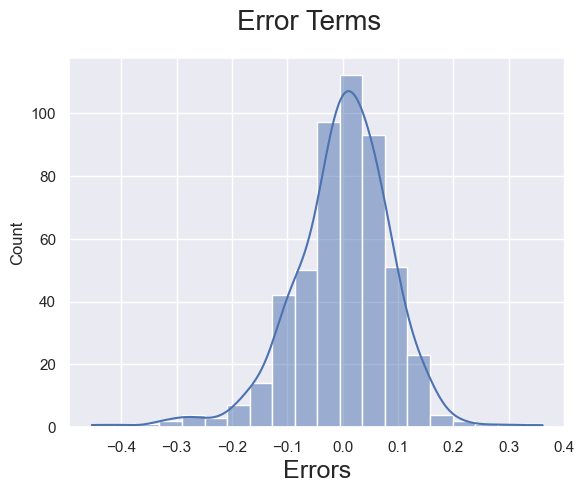

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns

#CALCULATING RESIDUALS
res=y_train - y_train_cnt

# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((res), kde = True,bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                       
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <ul>
           <b>Insight:</b><br> <li>It suggests that the assumption of normality is reasonably met for our regression model.</li>
           <li>This is a desirable characteristic, as it indicates that the model's predictions are distributed around the true values with random variation.</li>
        </ul>       
    </span>    
</div>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
            <b>Linearity check:</b>       
    </span>    
</div>

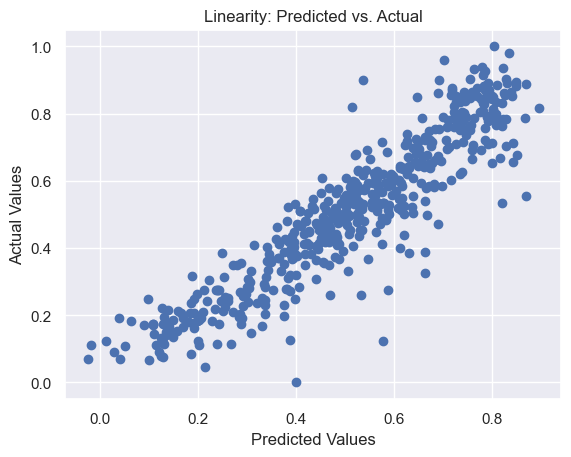

In [348]:
# Plotting predicted values vs. actual values
plt.scatter(y_train_cnt, y_train)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linearity: Predicted vs. Actual')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>The plot of predicted values against actual values appears to followed a linear pattern, it suggests that the assumption of linearity is reasonably met.
    </span>    
</div>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
            <b>Homoscedasticity (Constant Variance):</b>       
    </span>    
</div>

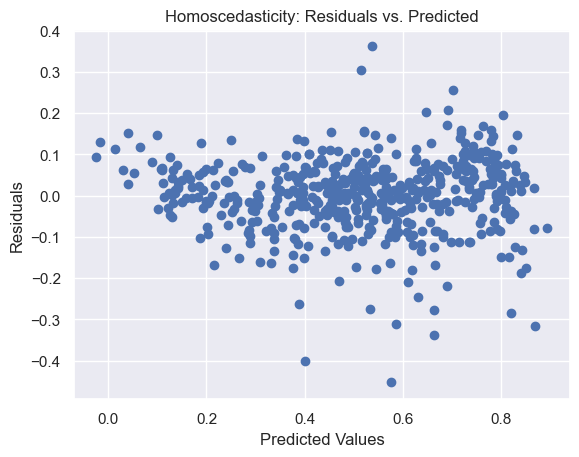

In [349]:
# Plotting residuals vs. predicted values
plt.scatter(y_train_cnt, res)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Residuals vs. Predicted')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>The spread of residuals is roughly constant across the range of predicted values, it indicates that the assumption of homoscedasticity is reasonably met.
    </span>    
</div>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
            <b>Independence of Residuals:</b>       
    </span>    
</div>

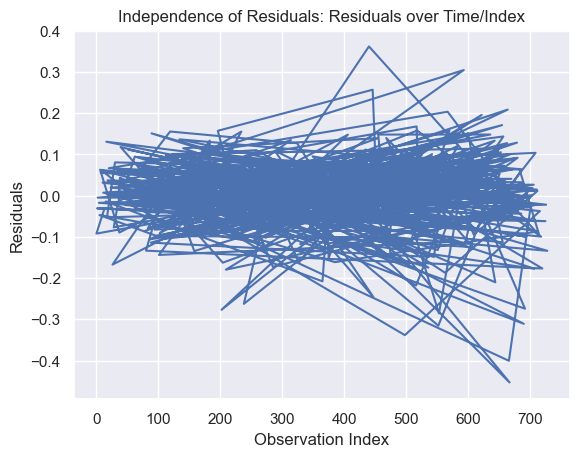

In [350]:
# Plotting residuals over time or index
plt.plot(res)
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.title('Independence of Residuals: Residuals over Time/Index')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>The plot of residuals over time or index appears to be random without any clear patterns, it suggests that the assumption of independence of residuals is reasonably met.
    </span>    
</div>

In [351]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_snow,weathersit_mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [352]:
# #Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

<div class="alert alert-block alert-info">Scaling the test data is an important step to ensure that the features are on the same scale as the training data, which is necessary for making accurate predictions.   
</div>

In [353]:
#  CREATING X AND Y
y_test = df_test['cnt']
X_test = df_test.drop('cnt', axis=1)

X_train_new=X_train_rfe13.drop(['const'], axis=1)

In [354]:
X_train_new.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,Sunday,9,season_summer,10
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,1
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,1,0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        a new DataFrame X_train_new created by dropping the 'const' column from the X_train_rfe13 DataFrame. This is done to align the columns of the training and test sets, as the 'const' column was added during the statsmodels' OLS regression.
    </span>    
</div>

In [355]:
X_train_new.columns = X_train_new.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

X_test_new = X_test[X_train_new.columns]

In [356]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [357]:
#Making predictions on the chosen model

y_pred = lm13.predict(X_test_new)

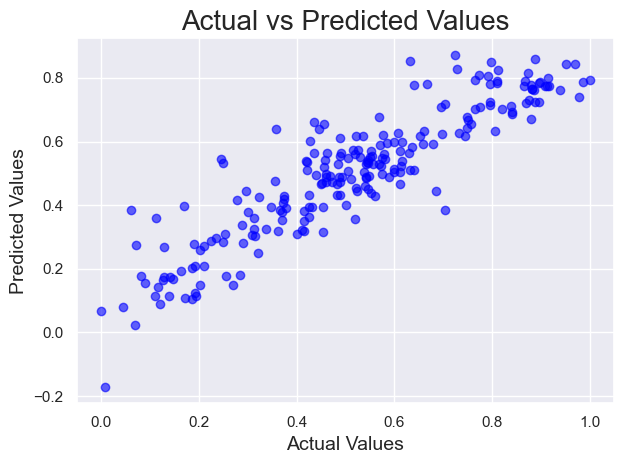

In [358]:
# Create a scatter plot of y_test vs y_pred
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

# Set plot title and labels
plt.title("Actual vs Predicted Values", fontsize=20)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)

# Customize plot aesthetics
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>We have a well-performing model for bike demand prediction. The observed and predicted bike demand closely align, demonstrating the model's ability to effectively capture and explain the variations in demand.
    </span>    
</div>

<a id="evaluation"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            10. Model Evaluation
            </span>   
        </font>    
</h2>

In [359]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [360]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 0.08060024048580616
MSE 0.010783446412037774
R2 score 0.8098772704280806


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>An R-squared value of 0.8098 indicates a reasonably good fit
    </span>    
</div>

<a id="conclusion"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            11. Additional Analysis and Conclusion
            </span>   
        </font>    
</h2>

In [361]:
# Baseline model: Predict the mean value of the target variable for all instances
y_baseline = np.full_like(y_test, np.mean(y_train))

# Calculate evaluation metrics for the baseline model
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline))
baseline_r2 = r2_score(y_test, y_baseline)

# Calculate evaluation metrics for your trained model
model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
model_r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics for comparison
print("Baseline RMSE:", baseline_rmse)
print("Baseline R-squared:", baseline_r2)
print("Model RMSE:", model_rmse)
print("Model R-squared:", model_r2)

Baseline RMSE: 0.23817028526896025
Baseline R-squared: -0.0001188434990657683
Model RMSE: 0.10384337442532275
Model R-squared: 0.8098772704280806


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br><li><b>Baseline RMSE:</b> The RMSE (Root Mean Squared Error) for the baseline model is 0.238, which represents the average prediction error when using a simple baseline that predicts the mean value of the target variable for all instances. The lower the RMSE, the better the model's performance. In comparison to the baseline model, my trained model has a lower RMSE of 0.103, indicating that it performs better in terms of reducing prediction errors.</li>
        <li><b>Baseline R-squared:</b> The R-squared value for the baseline model is -0.00011, which indicates that the baseline model explains almost none of the variance in the target variable. R-squared measures the proportion of variance in the target variable that is explained by the model.</li>
        <li>In contrast, our trained model has an R-squared value of 0.809, suggesting that approximately 80.9% of the variance in the target variable can be explained by the model. A higher R-squared value indicates a better fit of the model to the data.</li>
        <li>Overall, the evaluation metrics indicate that your trained model outperforms the baseline model in terms of both RMSE and R-squared. It demonstrates better predictive performance and explains a significant portion of the variance in the target variable compared to the simplistic baseline approach.</li>
    </span>    
</div>

In [362]:
# Get the coefficients and intercept
coefficients = lm13.params[1:]  # Exclude the intercept
intercept = lm13.params[0]  # Intercept term
# intercept = lm13.params['const']  # or Intercept term

# Create a list of feature names
feature_names = X_train_new.columns.tolist()

# Create the equation string
equation = f"cnt = {intercept:.4f}"
for feature, coefficient in zip(feature_names, coefficients):
    equation += f" + ({coefficient:.4f} * {feature})"
    
print("Equation for the best-fitted line:")
print(equation)


Equation for the best-fitted line:
cnt = 0.2368 + (0.2358 * yr) + (-0.1002 * holiday) + (0.4535 * atemp) + (-0.1340 * windspeed) + (-0.0855 * season_spring) + (0.0566 * season_winter) + (-0.2950 * weathersit_light_snow) + (-0.0837 * weathersit_mist) + (-0.0512 * Sunday) + (0.0893 * 9) + (0.0429 * season_summer) + (0.0430 * 10)


<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        Based on the equation for the best-fitted line, we can draw some conclusions about the factors that influence bike demand:     
    </span>    
</div>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <ol>
            <li><b> <span style="color:#17202a;">Year (yr):</span></b> The coefficient of 0.2358 suggests that for every unit increase in the year, bike demand increases by approximately 0.2368 units, indicating a positive correlation between the year and bike rentals. This could be due to factors such as increasing popularity of biking over time or overall economic growth.</li>
            <li><b><span style="color:red;">Holiday (`holiday`):</span></b> The coefficient of -0.1002 implies that during holidays, there is a slight decrease in bike demand. It's understandable as people may have different transportation preferences or travel plans during holidays.</li>
            <li><b> <span style="color:#17202a;">Temperature (atemp):</span></b> The coefficient of 0.4535 indicates that higher temperatures lead to increased bike demand. This makes sense as more people are likely to opt for biking in pleasant weather conditions.</li>
            <li><b><span style="color:red;">Windspeed </span></b> The coefficient of -0.1340 suggests that higher windspeeds negatively impact bike demand. Strong winds can deter people from using bicycles for transportation.</li>
            <li><b><span style="color:red;">Spring Season:</span></b> The coefficient for "season_spring" is -0.0855. This indicates that during the spring season, there is a negative impact on bike demand compared to the base season (season_fall). It suggests that people are less likely to rent bikes during the spring, possibly due to unpredictable weather conditions, occasional rain, or other factors that might make biking less appealing.</li>
            <li><b> <span style="color:#17202a;">Winter Season:</span></b> The coefficient for "season_winter" is 0.0566. This implies that during the winter season, there is a positive impact on bike demand compared to the base season (season_fall). It indicates that despite the colder temperatures, there is an increase in bike rentals during winter, possibly due to clear and dry days when people prefer biking for short commutes or leisure activities.</li>
            <li><b> <span style="color:#17202a;">Summer Season:</span></b> The coefficient for "season_summer" is 0.0429. This suggests that during the summer season, there is a positive impact on bike demand compared to the base season (season_fall). It implies that bike rentals tend to increase during the summer months, as the warm and pleasant weather encourages people to choose biking as a preferred mode of transportation and for outdoor activities.</li>
            <li><b><span style="color:red;">Light Snow Weather Situation: </span></b>The coefficient for "weathersit_light_snow" is -0.2950. This indicates that during light snow weather conditions, there is a significant negative impact on bike demand. It suggests that people are highly unlikely to rent bikes when there is light snowfall, which is understandable as snowy conditions can make biking difficult and less safe.</li>
            <li><b><span style="color:red;">Mist Weather Situation:</span></b>The coefficient for "weathersit_mist" is -0.0837. This implies that during misty weather conditions, there is a minor negative impact on bike demand. It indicates that people are less inclined to use bikes when visibility is reduced due to mist or fog, which can be seen as less favorable weather for outdoor activities like biking.</li>
            <li><b><span style="color:red;">Day of the Week (Sunday):</span></b> The coefficient of -0.0512 suggests that bike demand is slightly lower on Sundays compared to other days of the week.</li>
            <li><b><span style="color:#17202a;">Months:</span></b> Column 9 and 10 represent the months (September and October). The coefficients of 0.0893 and 0.0429, respectively, indicate that these months positively influence bike demand. It suggests that bike rentals tend to increase during these months, possibly due to favorable weather conditions or specific events in those months.</li>
        </ol>
    </span>    
</div>